In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
from scipy import integrate as integrate
import pandas as pd
from scipy.optimize import minimize
from scipy.special import erf
from matplotlib import cm
import scipy.integrate
from scipy import optimize
from scipy.integrate import odeint
from scipy import integrate as integrate
from scipy.interpolate import CubicSpline
from scipy.interpolate import lagrange
from scipy import interpolate


In [2]:
plt.style.use('default')
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

In [3]:
def threematmul(A,B,C):
    result= np.matmul(A.T,B)
    result= np.matmul(result,C)
    return result

## Parameters -> ( $\alpha, \Omega_b,  \Omega_c, H_o$)

In [4]:
def Einv(z,rm,rp,rho_critical,a1):
    a= 1/(1+z)
    a=a*a1
    omega = rm(a)/rho_critical
    omega_phi = rp(a)/rho_critical
    Evalue = np.sqrt(omega+omega_phi)
    return 1/Evalue
    

In [5]:
def E(z, parameters):   #Flat lambdaCDM universe
    omega_bh2=parameters[1]
    omega_ch2=parameters[2]
    h=parameters[3]/100
    omega_vh2=0.06/93.14
    omega=(omega_bh2+omega_ch2+omega_vh2)/h**2
    #print(omega)
    omega_k=parameters[0]
    omega_lambda = 1-omega-omega_k
    return ((omega*((1+z)**3)) + (omega_k*((1+z)**2))+ omega_lambda)**(1/2)

In [6]:
def E_zobs(parameters,z_obs):
    alpha= parameters[0]
    omega_bh2=parameters[1]
    omega_ch2=parameters[2]
    h=parameters[3]/100
    omega_vh2=0.06/93.14
    omega=(omega_bh2+omega_ch2+omega_vh2)/h**2
    #print(omega)
    t_initial = 10**(-5)
    t_final = 150
    dt = 10**(-4)
    t = np.arange(0., t_final, dt)
    
    #print(y0(alpha))
    sol = odeint (KG_eqn, y0(alpha), t, args=(parameters,))
    
    a=sol[:,0]
    phi=sol[:,1]
    phi_dot = sol[:,2]
    rho_m = 4.0/(9.0*(a**3))
    kappa_alpha = kappa(alpha)
    V = (1/2)*kappa_alpha/(phi)**(alpha)
    rho_phi = (1/6)*(0.5*phi_dot**2 + V)
    omega_exp = rho_m/(rho_phi+rho_m)
    #i = np.where(omega_exp>=omega)
    #i=i[0]
    #if (len(i)>1):
        #i=i[-1]
    #else:
        #i=len(t)-1
    #print(i)
    omega_exp = np.flipud(omega_exp)
    omega_exp_diff = omega_exp[1:]
    omega_exp_diff = np.diff(omega_exp)
    zeros= np.where(omega_exp_diff>0)
    zeros=zeros[0]
    #print(zeros)
    zeros=zeros+1
    omega_exp_new= omega_exp[zeros]
    aflip = np.flipud(a[zeros])
    g = interpolate.interp1d(omega_exp_new,aflip,fill_value = "extrapolate")
    #size = omega_exp.size
    a1 = g(omega)
    #print(a1)
    rm = interpolate.interp1d(a,rho_m,fill_value = "extrapolate")
    rp =interpolate.interp1d(a,rho_phi,fill_value = "extrapolate")
    #rho_critical = rho_m[i]+rho_phi[i]
    rho_critical = rm(a1)+rp(a1)
    Einv_array = np.zeros(len(z_obs))
    for i in range(len(z_obs)):
        Einv_array[i] = integrate.quad(Einv,0,(z_obs[i]),args=(rm,rp,rho_critical,a1,))[0]
    #print(rho_critical)
    #a = a/sol[i,0]
#     z_values = (1/a)-1
#     omega_m_theo=rho_m/rho_critical
#     omega_phi_theo=rho_phi/rho_critical
#     start = time.time()
#     E_values = np.sqrt(omega_m_theo+omega_phi_theo)
#     z_values = np.flipud(z_values)
#     E_values = np.flipud(E_values)
#     z_bw_0_1000 = np.where((z_values>=0) & (z_values<=20))
#     z_bw_0_1000_values =z_values[z_bw_0_1000]
#     E_bw_0_1000_values= E_values[z_bw_0_1000]
#     #print(z_bw_0_1000_values)
#     f = CubicSpline(z_bw_0_1000_values, E_bw_0_1000_values)
    a_obs = 1/(1+z_obs)
    a_obs = a_obs*a1
    omega_m_obs = rm(a_obs)/rho_critical
    omega_phi_obs = rp(a_obs)/rho_critical
    E_array = np.sqrt(omega_m_obs+omega_phi_obs)
    return (E_array, Einv_array)

In [7]:
E_zobs([1.1,0.03,0.09,65.89],z_obs1)[1]

NameError: name 'z_obs1' is not defined

# Distance Measures


In [8]:
def Dh(parameters,z,E_value):
    c= 3*(10**5)
    Ho= parameters[3]
    return c/(Ho*E_value)

In [9]:
#Dc
def Dc(parameters,z,Einv_value):
    c= 3*(10**5)
    Ho = parameters[3]
    #print(z)
    #print(f"The parameters are {parameters},z ={z}")
    #p2 = integrate.quad(f,0,(z),args=(parameters,))[0]
    
    return (c/Ho)*Einv_value

    

In [10]:
#$Dm
def Dm(parameters,z,Einv_value):
    c= 3*(10**5)
    omega_k = parameters[0]
    Ho = parameters [3]
    dh = c/Ho
    dc= Dc(parameters,z,Einv_value)
    #print(dc)
    
    #print(p1)
   
    #if omega_k ==0:
    return dc
    #elif omega_k > 0:
        #p1= dh/(np.sqrt(omega_k))
        #return p1*np.sinh(dc/p1)
    #else :
        #p2=dh/(np.sqrt(abs(omega_k)))
        #return p2*np.sin(dc/p2)
        
        
    

In [11]:
def Da(parameters,z,Einv_value):
    return (Dm(parameters,z,Einv_value)/(1+z))

In [12]:
def Dv(parameters,z,E_value,Einv_value):
    c= 3*(10**5)
    Ho=parameters[3]
    return (((c/Ho)*((Dm(parameters,z,Einv_value))**2)*(z/E_value))**(1/3))

# Sound Horizon

In [13]:
def rs(parameters,z):
    omega_bh2 = parameters[1]
    omega_ch2 = parameters[2]
    omega_vh2 = 0.06/93.14
    p1=np.exp(-72.3*(omega_vh2+0.0006)**2)
    p2= ((omega_bh2)**(0.12807))*(((omega_ch2+omega_bh2))**(0.25351))
    return 55.154*p1/p2

In [14]:
def Chi_sq1(parameters,H_obs1,z_obs1,sigma_obs1,E_array1):
    #print(z_obs1.shape)
    n = z_obs1.shape[0]
    H_theo1 = np.zeros(n)
    Ho=parameters[3]
    chi_sq=0
    for i in range(n):
        H_theo1[i]= Ho*(E_array1[i])
        chi_sq= chi_sq+(H_obs1[i]-H_theo1[i])**2/(sigma_obs1[i])**2
    #print((f"H_theo-H_obs for H(z) data { H_theo1-H_obs1}"))
    #print(f"Chi_sq for H(z) data: {chi_sq}")
    return chi_sq
    

In [15]:
def Chi_sq2(parameters,D_obs,z_obs,cov_matrix,E_array2,Einv_arrray2):
    datapoints= z_obs.shape
    D_theo= np.zeros(datapoints)
    Ho=parameters[3]
    
    dm_indices= [1,3,5,8,10]
    dh_indices=[2,4,6,9,11]
    da_indices = [7]
    dv_indices = [0]
    rs_fid= 147.5
    rs_values = rs(parameters,z_obs)
    #print(rs_values)
    for i in dv_indices:
        #print(z_obs[i].type)
        D_theo[i]= Dv(parameters,z_obs[i],E_array2[i],Einv_arrray2[i])*rs_fid/rs_values
    for i in da_indices:
        D_theo[i]=Da(parameters,z_obs[i],Einv_arrray2[i])/rs_values
    for i in dm_indices:
        D_theo[i]=Dm(parameters,z_obs[i],Einv_arrray2[i])/rs_values
    for i in dh_indices:
        D_theo[i]=Dh(parameters,z_obs[i],E_array2[i])/rs_values
  
    #print(D_theo)
    D_theo= D_theo-D_obs
    #print((f"D_theo-D_obs for BAO data { D_theo.T}"))
    #result= np.matmul(D_theo.T,np.linalg.inv(cov_matrix))
    #result=np.matmul(result,D_theo)
    cov_1 = 1/(cov_matrix[0,0])
    cov_2= np.linalg.inv((cov_matrix[1:5,1:5]))
    cov_3 = np.linalg.inv((cov_matrix[5:7,5:7]))
    cov_4=1/(cov_matrix [7,7])
    cov_5=np.linalg.inv((cov_matrix[8:10,8:10]))
    cov_6 = np.linalg.inv((cov_matrix[10:12,10:12]))
    result1 = D_theo[0]*cov_1*D_theo[0]
    result2 = threematmul (D_theo[1:5],cov_2,D_theo[1:5])
    result3 = threematmul (D_theo[5:7],cov_3,D_theo[5:7])
    result4 = D_theo[7]*cov_4*D_theo[7]
    result5 = threematmul (D_theo[8:10],cov_5,D_theo[8:10]) 
    result6 = threematmul (D_theo[10:12],cov_6,D_theo[10:12])
    
    #print(f"Chi_sq for BAO data: {result1+result2+result3+result4+result5+result6}")
    #print(result1)
    #print(result2)
    #print(result3)
    #print(result4)
    #print(result5)
    #print(result6)
    
    #return (result1+result2+result3+result4+result5+result6).ravel()
    return(threematmul(D_theo,np.linalg.inv(cov_matrix),D_theo)).ravel()
        
        
    
    
    
    
    


In [16]:
def Chi_sq(parameters,H_obs1,z_obs1,sigma_obs1,D_obs,z_obs,cov_matrix):
    n = z_obs1.shape[0]
    z_obs_total = np.concatenate((z_obs1,z_obs))
    E_array,Einv_array = E_zobs(parameters,z_obs_total)
    E_array1 = E_array[:n]
    E_array2 = E_array[n:]
    Einv_arrray2 = Einv_array [n:]
    return Chi_sq2(parameters,D_obs,z_obs,cov_matrix,E_array2,Einv_arrray2)+ Chi_sq1(parameters,H_obs1,z_obs1,sigma_obs1,E_array1)

In [17]:
def log_likelihood(parameters,H_obs1,z_obs1,sigma_obs1,D_obs,z_obs,cov_matrix):
    return (-Chi_sq(parameters,H_obs1,z_obs1,sigma_obs1,D_obs,z_obs,cov_matrix)/2)

In [1]:
def log_prior(parameters):
    alpha,omega_bh2,omega_ch2,Ho = parameters
    #and 50<Ho<85
    if 0 < alpha < 10 and 0<=omega_bh2<=1  and 0<=omega_ch2<=1 and 50<=Ho<=85  :
        return 0.0
    return -np.inf
#No prior on Ho

In [19]:
def log_probability(parameters,H_obs1,z_obs1,sigma_obs1,D_obs,z_obs,cov_matrix):
    lp = log_prior(parameters)
    if not np.isfinite(lp):
        return -np.inf
   
    return lp + log_likelihood(parameters,H_obs1,z_obs1,sigma_obs1,D_obs,z_obs,cov_matrix)

# Preparing H data

In [21]:
Data = pd.read_csv("Hdata_Updated.csv")
Data = Data.to_numpy()
z_obs1 = Data[:,0]
z_obs1 = np.reshape(z_obs1,(32,1))
H_obs1 = Data[:,1]
sigma_obs1 = Data[:,2]
print(z_obs1.shape)
print(Data)

(32, 1)
[[7.000e-02 6.900e+01 1.960e+01]
 [9.000e-02 6.900e+01 1.200e+01]
 [1.200e-01 6.860e+01 2.620e+01]
 [1.700e-01 8.300e+01 8.000e+00]
 [1.790e-01 7.500e+01 4.000e+00]
 [1.990e-01 7.500e+01 5.000e+00]
 [2.000e-01 7.290e+01 2.960e+01]
 [2.700e-01 7.700e+01 1.400e+01]
 [2.800e-01 8.880e+01 3.660e+01]
 [3.520e-01 8.300e+01 1.400e+01]
 [3.802e-01 8.300e+01 1.350e+01]
 [4.000e-01 9.500e+01 1.700e+01]
 [4.004e-01 7.700e+01 1.020e+01]
 [4.247e-01 8.710e+01 1.120e+01]
 [4.497e-01 9.280e+01 1.290e+01]
 [4.700e-01 8.900e+01 5.000e+01]
 [4.783e-01 8.090e+01 9.000e+00]
 [4.800e-01 9.700e+01 6.200e+01]
 [5.930e-01 1.040e+02 1.300e+01]
 [6.800e-01 9.200e+01 8.000e+00]
 [7.500e-01 9.880e+01 3.360e+01]
 [7.810e-01 1.050e+02 1.200e+01]
 [8.750e-01 1.250e+02 1.700e+01]
 [8.800e-01 9.000e+01 4.000e+01]
 [9.000e-01 1.170e+02 2.300e+01]
 [1.037e+00 1.540e+02 2.000e+01]
 [1.300e+00 1.680e+02 1.700e+01]
 [1.363e+00 1.600e+02 3.360e+01]
 [1.430e+00 1.770e+02 1.800e+01]
 [1.530e+00 1.400e+02 1.400e+01]
 [

# Preparing BAO Data

In [23]:
Data = pd.read_csv("BAO_data.csv")
Data=Data.to_numpy()
cov_matrix=np.array([[289,0,0,0,0,0,0,0,0,0,0,0],
[0,0.0286052,-0.04939281,0.01489688,-0.01387079,0,0,0,0,0,0,0],
[0,-0.04939281,0.5307187,-0.02423513,0.1767087,0,0,0,0,0,0,0],
[0,0.01489688,-0.02423513,0.04147534,-0.04873962,0,0,0,0,0,0,0],
[0,-0.01387079,0.1767087,-0.04873962,0.3268589,0,0,0,0,0,0,0],
[0,0,0,0,0,0.1076634008565565,-0.05831820341302727,0,0,0,0,0],
[0,0,0,0,0,-0.05831820341302727,0.2838176386,0,0,0,0,0],
[0,0,0,0,0,0,0,0.1849,0,0,0,0],
[0,0,0,0,0,0,0,0,0.63731604,0.1706891,0,0],
[0,0,0,0,0,0,0,0,0.1706891,0.30468415,0,0],
[0,0,0,0,0,0,0,0,0,0,1.3225,-0.1009],
[0,0,0,0,0,0,0,0,0,0,-0.1009,0.038]])
#cov_matrix = cov_matrix.astype(float)
print(Data)
print((cov_matrix))

[[           nan            nan 1.22000000e-01 5.39000000e+02]
 [           nan            nan 3.80000000e-01 1.02340600e+01]
 [           nan            nan 3.80000000e-01 2.49805800e+01]
 [           nan            nan 5.10000000e-01 1.33659500e+01]
 [           nan            nan 5.10000000e-01 2.23165600e+01]
 [           nan            nan 6.98000000e-01 1.78582369e+01]
 [           nan            nan 6.98000000e-01 1.93257537e+01]
 [           nan            nan 8.10000000e-01 1.07500000e+01]
 [           nan            nan 1.48000000e+00 3.06876000e+01]
 [           nan            nan 1.48000000e+00 1.32609000e+01]
 [           nan            nan 2.33400000e+00 3.75000000e+01]
 [           nan            nan 2.33400000e+00 8.99000000e+00]]
[[ 2.89000000e+02  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  2.86052000e-02 -4.9392810

In [24]:
z_obs = Data[:,2].astype(float)
z_obs = np.reshape(z_obs, (12,1))
D_obs = Data[:,3].astype(float)
D_obs = np.reshape(D_obs,(12,1))
print(cov_matrix.shape)
print(z_obs.T.shape)
print(z_obs)

(12, 12)
(1, 12)
[[0.122]
 [0.38 ]
 [0.38 ]
 [0.51 ]
 [0.51 ]
 [0.698]
 [0.698]
 [0.81 ]
 [1.48 ]
 [1.48 ]
 [2.334]
 [2.334]]


In [25]:
z_obs_total = np.concatenate((z_obs1,z_obs))
z_obs_total

array([[0.07  ],
       [0.09  ],
       [0.12  ],
       [0.17  ],
       [0.179 ],
       [0.199 ],
       [0.2   ],
       [0.27  ],
       [0.28  ],
       [0.352 ],
       [0.3802],
       [0.4   ],
       [0.4004],
       [0.4247],
       [0.4497],
       [0.47  ],
       [0.4783],
       [0.48  ],
       [0.593 ],
       [0.68  ],
       [0.75  ],
       [0.781 ],
       [0.875 ],
       [0.88  ],
       [0.9   ],
       [1.037 ],
       [1.3   ],
       [1.363 ],
       [1.43  ],
       [1.53  ],
       [1.75  ],
       [1.965 ],
       [0.122 ],
       [0.38  ],
       [0.38  ],
       [0.51  ],
       [0.51  ],
       [0.698 ],
       [0.698 ],
       [0.81  ],
       [1.48  ],
       [1.48  ],
       [2.334 ],
       [2.334 ]])

## Differential Equation Solving


In [26]:
def kappa(alpha):
    #print(alpha)
    #print(type(alpha))
    p1= (8*alpha+32)/(3*alpha+6)
    p2= ((2*(alpha**2)+4*alpha)/3)**(alpha/2)
    #print(f"kappa:{p1*p2}")
    return p1*p2

In [27]:
def y0(alpha):
    t0 = 10**(-5)
    a_initial = (t0**(2./3.))
    phi_initial =   ((2.*alpha*(alpha+2.)/3.)**(1/2.))*((t0)**(2./(alpha+2.)))
   
    phi_dot_initial = (((8./3.)*alpha*(1./(alpha + 2.)))**(1./2.))/(t0)**(alpha/(alpha + 2.))
    
    Ho = 70 # Hubble parameter today in units of 100 km/s/Mpc (Planck 2015)
    rho_cr0 = 3*Ho**2/(8*np.pi)
    #h = 0.678 # Hubble parameter today in units of 100 km/s/Mpc (Planck 2015)
    #rho_cr0 = 8.0992*(h**2)*10**(-47) / (2.435*10**18)**4
    # calculate the matter density today
    
    #Omega_m = 0.28
    #rho_m0 = Omega_m*rho_cr0
    #rho_initial = rho_m0/(a_initial**3) # initial value for the matter density
    
    return a_initial,phi_initial,phi_dot_initial
    #,rho_initial

In [28]:
def KG_eqn(y, t, parameters):
    #a,phi,phi_dot,rho_m = y
    a,phi,phi_dot = y
    rho_m = 4.0/(9.0*a**3)
    alpha=parameters[0]
    kappa_alpha = kappa(alpha)
    mp = 1
    V = (1/2)*kappa_alpha*mp**2/(phi)**(alpha)
    rho_phi = (1/6)*(0.5*phi_dot**2 + V)
    Hubble_rate = np.sqrt( (rho_phi + rho_m))
    #dydt = [a*Hubble_rate,phi_dot,-3*Hubble_rate*phi_dot+ 0.5*kappa_alpha*alpha/(phi**(alpha+1)), -3*rho_m*Hubble_rate ]
    dydt = [a*Hubble_rate,phi_dot,-3*Hubble_rate*phi_dot+ 0.5*kappa_alpha*alpha/(phi**(alpha+1)) ]
    return dydt

In [29]:
#Theoretical Values
parameters = [1.01,0.0310,0.0900,65.89] #parameters as obtained in 2203.10825
#print(np.matmul(D_obs.T,cov_matrix))
print(Chi_sq(parameters,H_obs1,z_obs1,sigma_obs1,D_obs,z_obs,cov_matrix)) 
#Evaluation of Chi_sq(min) value at parameters
#This value obtained in 2203.10825 is equal to 25.30

#print(Chi_sq2(parameters,H_obs1,z_obs1,sigma_obs1))

[22.91839021]


In [274]:
cov_1 = cov_matrix[0,0]
cov_2=  np.linalg.inv(cov_matrix[1:5,1:5])
cov_3 = np.linalg.inv(cov_matrix[5:7,5:7])
cov_4=cov_matrix [7,7]
cov_5= np.linalg.inv(cov_matrix[8:10,8:10])
cov_6 = np.linalg.inv(cov_matrix[10:12,10:12])
cov_7 = np.linalg.inv(cov_matrix)
print(cov_5)
print(cov_6)

[[ 1.84606347 -1.03419529]
 [-1.03419529  3.86146067]]
[[ 0.94824125  2.51783005]
 [ 2.51783005 33.00129086]]


In [96]:
print(Dv(parameters,0.122)*147.5/rs(parameters,0.122))
print(np.linalg.inv(cov_matrix))

0.122
505.25404077758816
13552.618543578767
288.40704582579366


TypeError: No loop matching the specified signature and casting was found for ufunc inv

In [54]:
print(505.25404077758816/0.0007378647873726219)

684751.5282260444


In [43]:
print(np.exp(-3.085))

0.04573003390021825


In [29]:
Ho= 68
sigma_Ho=2.8
[0.05,0.025,0.12,70
 0.048,0.026,0.1098,68.86

In [65]:
print(rs([2.62998306e-01, 1.42092066e-02 ,8.12893791e-03 ,7.64451454e+01],0.122))

249.2653204776462


In [72]:
best_fit_params = minimize (Chi_sq,x0=[0,0,0,70],args=(H_obs1,z_obs1,sigma_obs1,D_obs,z_obs,cov_matrix),bounds=[(0,10),(0,1),(0,1),(0,np.inf)])
print(best_fit_params)

/tmp/ipykernel_31398/1907978813.py:12: RuntimeWarning: invalid value encountered in double_scalars
  dydt = [a*Hubble_rate,phi_dot,-3*Hubble_rate*phi_dot+ 0.5*kappa_alpha*alpha/(phi**(alpha+1)) ]
/usr/lib/python3/dist-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess accuracy requested (tolerances too small). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/tmp/ipykernel_31398/1537152675.py:20: RuntimeWarning: divide by zero encountered in true_divide
  rho_m = 4.0/(9.0*(a**3))
/tmp/ipykernel_31398/1537152675.py:24: RuntimeWarning: invalid value encountered in true_divide
  omega_exp = rho_m/(rho_phi+rho_m)


 lsoda--  at t (=r1), too much accuracy requested    
       for precision of machine..  see tolsf (=r2)   
      in above,  r1 =  0.1000000000000D-03   r2 =                  NaN


ValueError: cannot reshape array of size 0 into shape (0,newaxis)

In [74]:
bfp = dict()
bfp['DA'] = optimize.dual_annealing(Chi_sq, [(0,10),(0,1),(0,1),(0,100)],args =(H_obs1,z_obs1,sigma_obs1,D_obs,z_obs,cov_matrix) )
print(bfp["DA"])

/tmp/ipykernel_31398/1537152675.py:51: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  Einv_array[i] = integrate.quad(Einv,0,(z_obs[i]),args=(rm,rp,rho_critical,a1,))[0]
/tmp/ipykernel_31398/1537152675.py:51: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  Einv_array[i] = integrate.quad(Einv,0,(z_obs[i]),args=(rm,rp,rho_critical,a1,))[0]
/tmp/ipykernel_31398/1337508188.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  return 55.154*p1/p2


     fun: 22.30785308201004
 message: ['Maximum number of iteration reached']
    nfev: 8276
    nhev: 0
     nit: 1000
    njev: 55
  status: 0
 success: True
       x: array([1.01342559e+00, 3.22408751e-02, 8.85689223e-02, 6.58889655e+01])


In [75]:
best_fit_params= bfp["DA"]

In [76]:
print(np.round((best_fit_params.x),4))
print(np.round((best_fit_params.fun),4))
sol=best_fit_params.x
print(f"Best Fit \Omega_m {(sol[1]+sol[2]+0.06/93.14)/(sol[3]/100)**2}")
print(f"BIC {best_fit_params.fun+ 4*np.log(44)}")
print()

[1.0134e+00 3.2200e-02 8.8600e-02 6.5889e+01]
22.3079
Best Fit \Omega_m 0.2797605066095237
BIC 37.44461161768309



In [31]:
import emcee
from multiprocessing import Pool
with Pool() as pool:

    pos =[1.0134e+00, 3.2200e-02, 8.8600e-02, 6.5889e+01] + 1e-4 * np.random.randn(100, 4)
    nwalkers, ndim = pos.shape

    #filename = "BAO_LCDM.h5"
    #backend = emcee.backends.HDFBackend(filename)
    #backend.reset(nwalkers, ndim)

    sampler = emcee.EnsembleSampler(
        nwalkers, ndim, log_probability, args=(H_obs1,z_obs1,sigma_obs1,D_obs,z_obs,cov_matrix),pool=pool
    )

    sampler.run_mcmc(pos, 7000, progress=True);

100%|████████████████████████████████████| 7000/7000 [26:38:05<00:00, 13.70s/it]


In [32]:
tau = sampler.get_autocorr_time()
print(tau)
tau = sampler.get_autocorr_time()
burnin = int(2 * np.max(tau))
thin = int(0.5 * np.min(tau))
flat_samples = sampler.get_chain(discard=burnin,thin= thin, flat=True)
labels = ["alpha", "omega_bh2", "omega_ch2", "Ho"]
print("burn-in: {0}".format(burnin))
print("thin: {0}".format(thin))
print("flat chain shape: {0}".format(flat_samples.shape))

[78.28073403 80.9579975  80.57122346 58.76791914]
burn-in: 161
thin: 29
flat chain shape: (23500, 4)


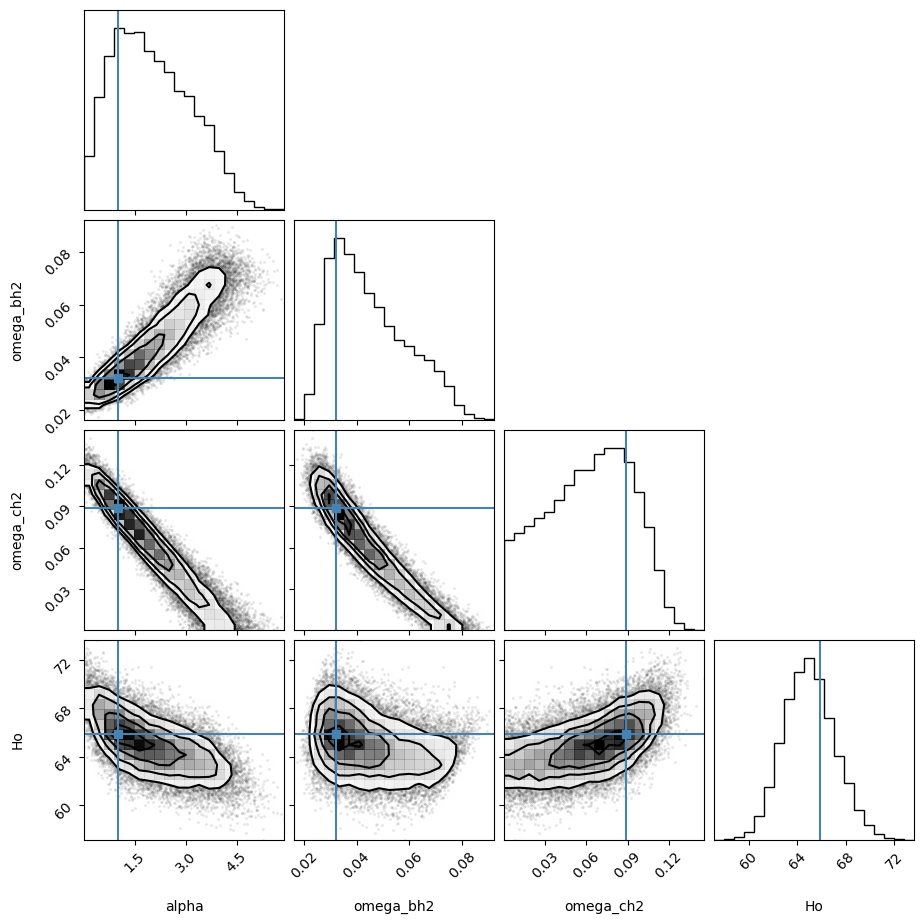

In [34]:
import corner
flat_samples = sampler.get_chain(discard=burnin, thin=thin, flat=True)
fig = corner.corner(
    flat_samples, labels=labels, truths=[1.0134e+00, 3.2200e-02, 8.8600e-02, 6.5889e+01])

In [35]:
from IPython.display import display, Math

for i in range(4):
#     if(i==2 or i ==3):
#         mcmc = np.percentile(flat_samples[:, i], [31.73, 50, 68.27])
#         q = np.diff(mcmc)
#         minimum = mcmc[1]-q[0]
#         maximum = mcmc[1]+q[1]
#         #print(f"{minimum} $\le \Omega \ge$ {maximum}")
#         txt = "\mathrm{{{2}}} = {0:.4f} \pm {{{1:.4f}}}"
#         txt = txt.format(mcmc[1], q[0], labels[i])
#         display(Math(txt))
    if(i<4):
        mcmc = np.percentile(flat_samples[:, i], [4.55, 50, 95.45])
        q = np.diff(mcmc)
        minimum = mcmc[1]-q[0]
        maximum = mcmc[1]+q[1]
        #print(f"{minimum} $\le \Omega \ge$ {maximum}")
        txt = "\mathrm{{{3}}} = {0:.4f}_{{{1:.4f}}}^{{{2:.4f}}}"
        txt = txt.format(mcmc[1], -q[0], +q[1], labels[i])
        display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [36]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'..')))
from getdist import plots, MCSamples
import getdist
import matplotlib.pyplot as plt
import IPython
print('GetDist Version: %s, Matplotlib version: %s'%(getdist.__version__, plt.matplotlib.__version__))

GetDist Version: 1.4, Matplotlib version: 3.5.1


In [41]:
names = ["alpha","omega_bh2","omega_ch2","Ho"]
labels =  ["alpha","\Omega_{b} h^2","\Omega_{c} h^2","H_o"]
samples2 = MCSamples(samples=flat_samples,names = names, labels = labels)

Removed no burn in


<Figure size 600x450 with 0 Axes>

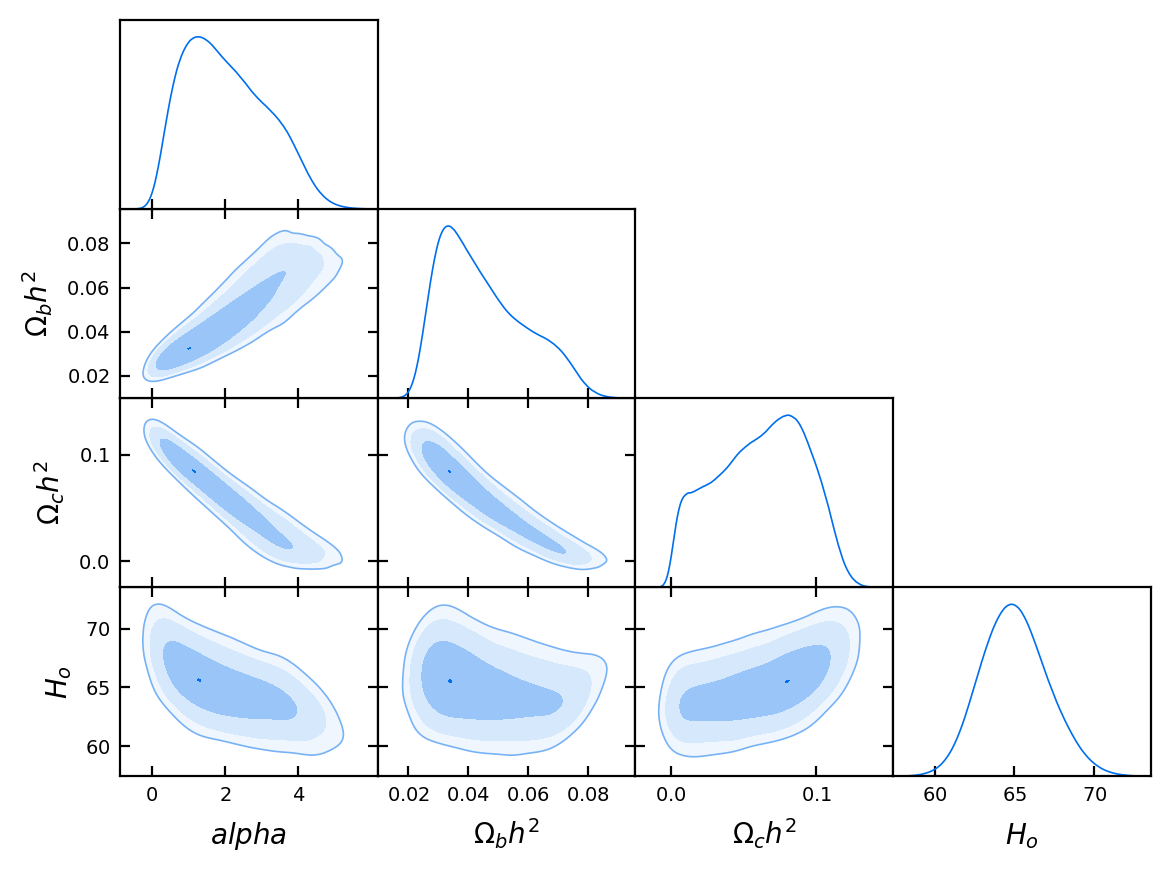

In [42]:
g = plots.get_single_plotter()
samples2.updateSettings({'contours': [0.001,0.68, 0.95, 0.99]})
g.settings.num_plot_contours = 4
g.triangle_plot([samples2], filled=True);

In [43]:
p = samples2.getParams() 
print(p)
assert np.all(p.alpha == samples2['alpha'])
samples2.addDerived((0.06/93.14+ p.omega_bh2+ p.omega_ch2)/(p.Ho/100)**2, name='omega', label='\Omega_m')



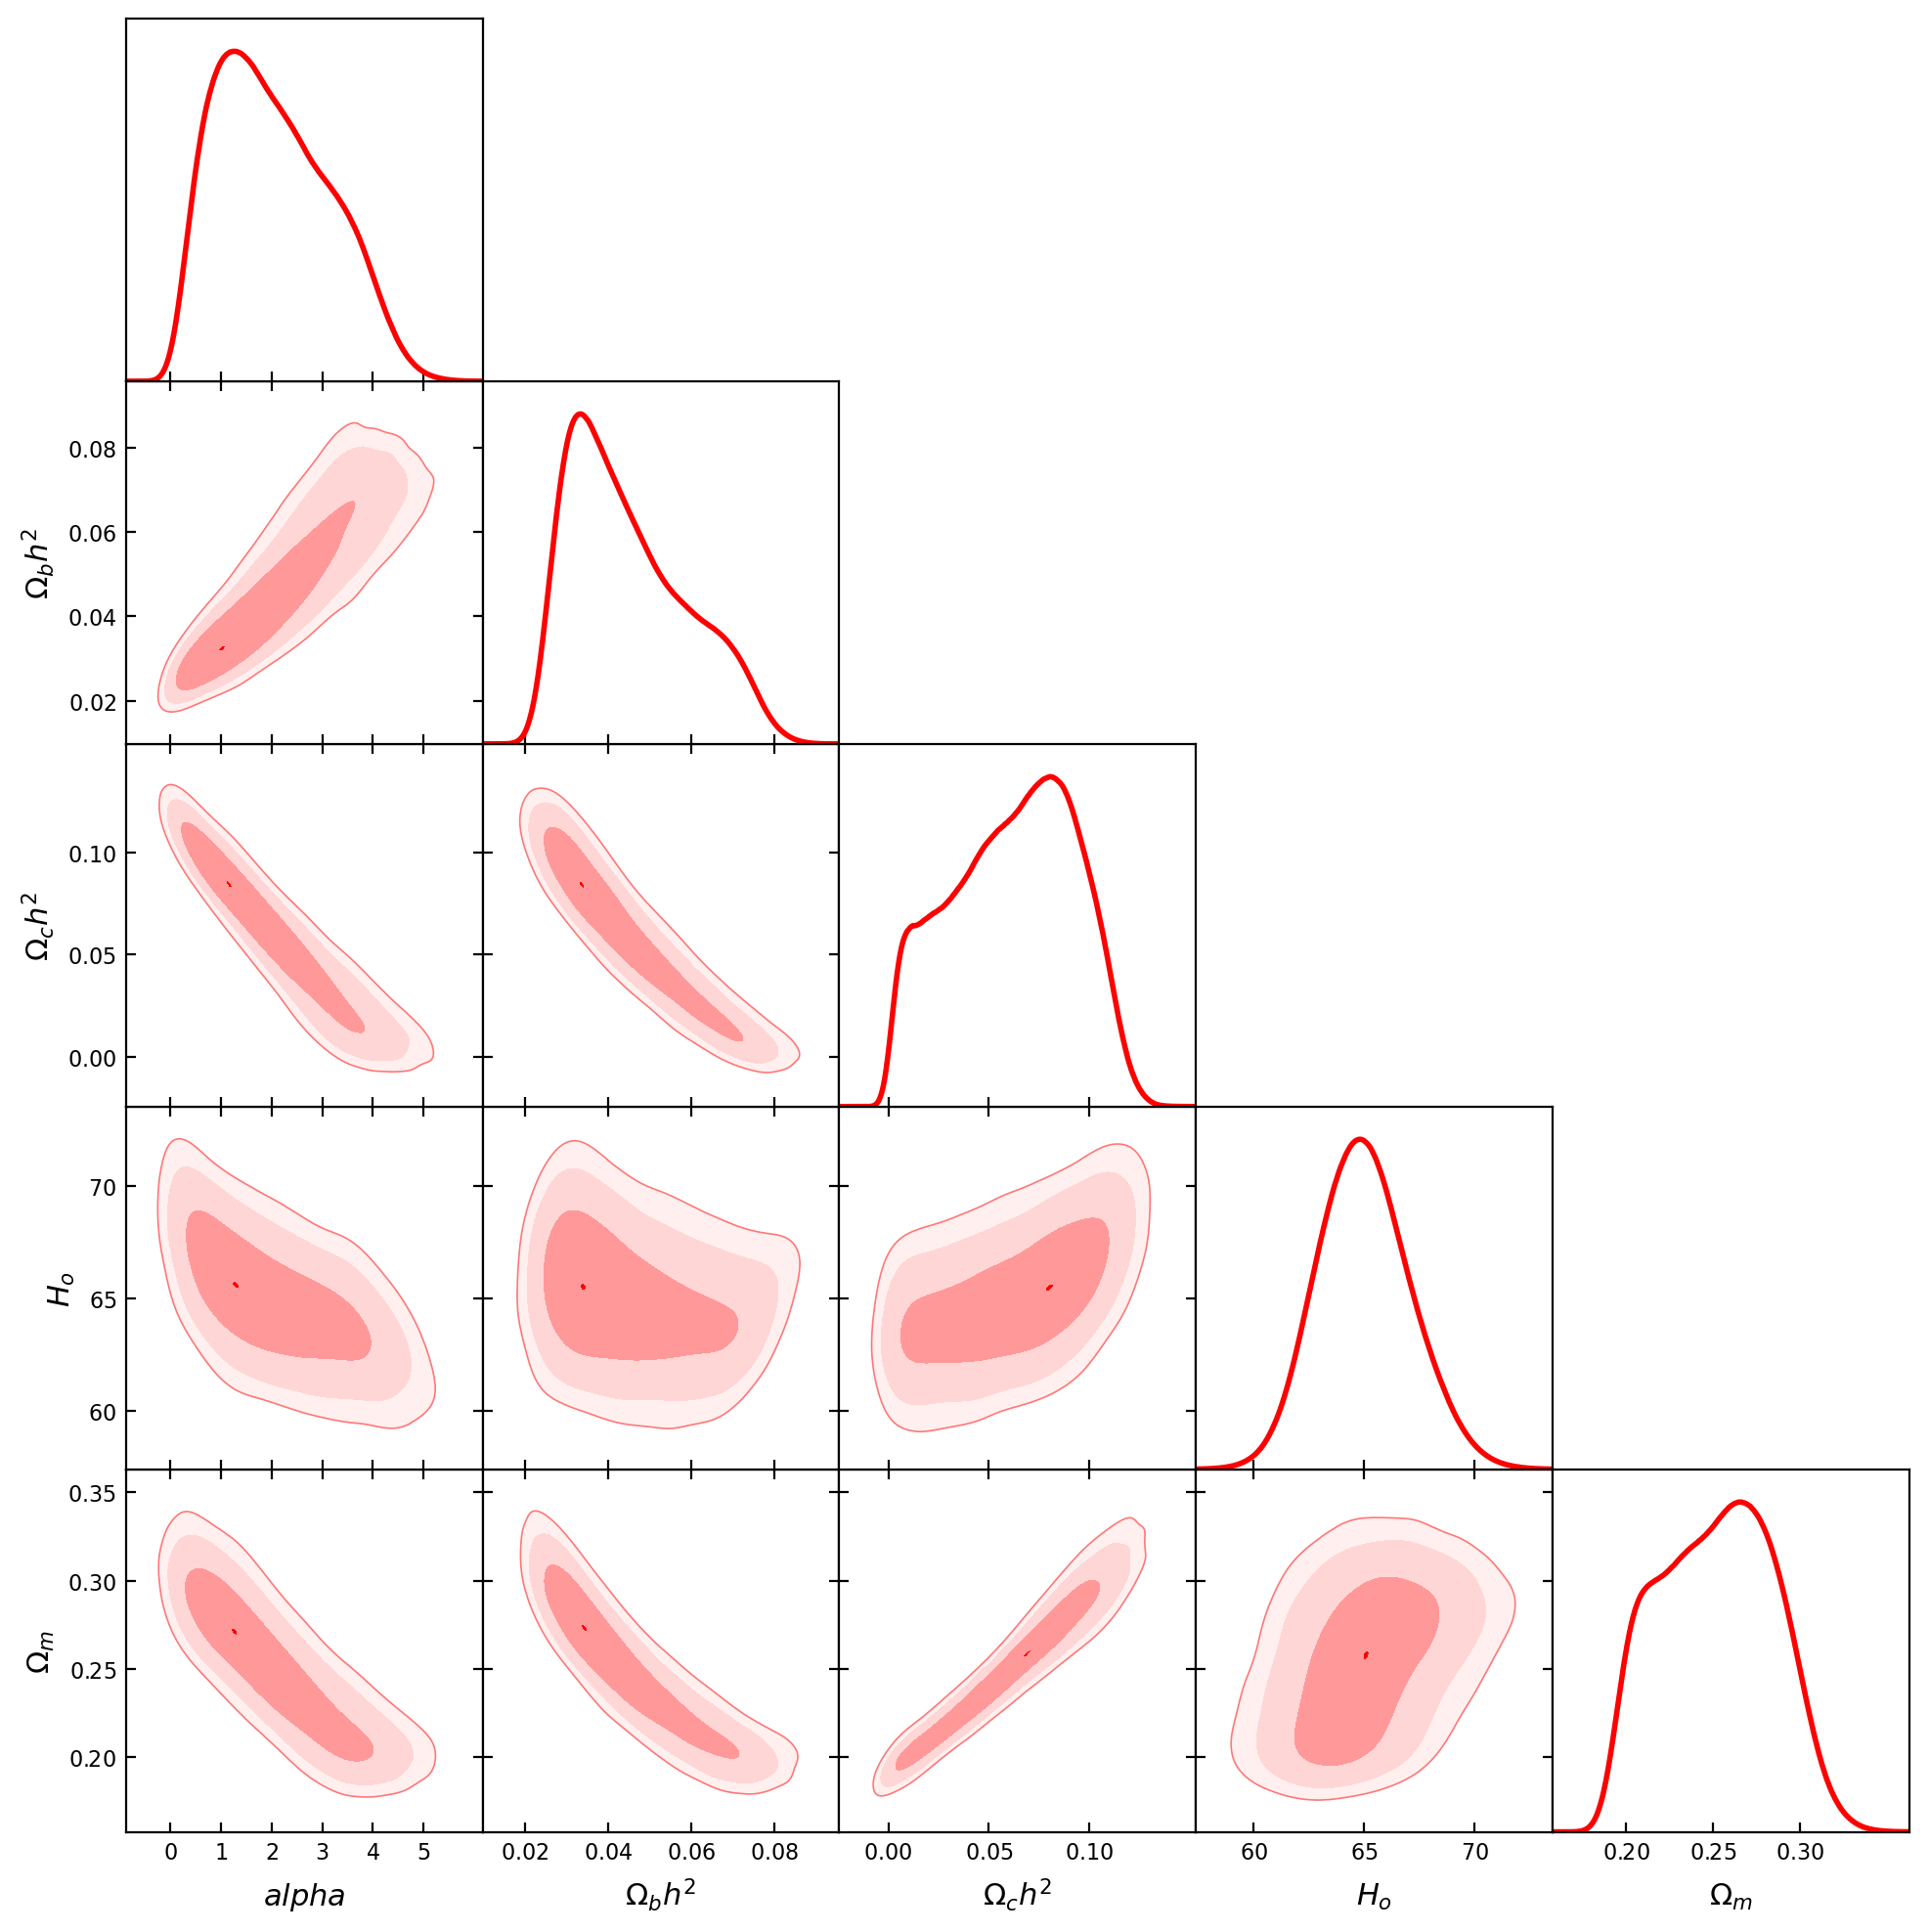

In [44]:
from matplotlib import cm
samples2.updateSettings({'contours': [0.001,0.68, 0.95, 0.99]})
g = plots.get_subplot_plotter(subplot_size=2)
g.settings.num_plot_contours = 4
g.settings.solid_colors='tab10'
g.triangle_plot([samples2], filled=True,contour_lws=2, contour_colors=['red']);
g.export("BAO_LCDM.png")

In [94]:
print(samples2.getInlineLatex('omega',limit=1))

\Omega_m = 0.288779^{-0.000014}_{-0.00010}


In [108]:
print(samples2.getTable().tableTex())
#getdist.types.ResultTable(limit=2)

\begin{tabular} { l  c}

 Parameter &  68\% limits\\
\hline
{\boldmath$\Omega_{ko}    $} & $0.064^{+0.079}_{-0.090}   $\\

{\boldmath$\Omega_{b} h^2 $} & $0.0275^{+0.0036}_{-0.0057}$\\

{\boldmath$\Omega_{c} h^2 $} & $0.107^{+0.017}_{-0.017}   $\\

{\boldmath$H_o            $} & $68.4^{+2.0}_{-2.0}        $\\

$\Omega_m                  $ & $0.289^{+0.022}_{-0.022}   $\\
\hline
\end{tabular}


TypeError: __init__() missing 2 required positional arguments: 'ncol' and 'results'

In [142]:
for i in ["omega_k","omega_bh2","omega_ch2","Ho","omega"]:
    print(samples2.getInlineLatex(i,limit=1))

\Omega_{ko} = 0.064\pm 0.086
\Omega_{b} h^2 = 0.0275\pm 0.0050
\Omega_{c} h^2 = 0.10711^{+0.00027}_{+0.00023}
H_o = 68.411^{-0.013}_{-0.016}
\Omega_m = 0.288671^{-0.000025}_{-0.000081}
